In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deepfake256-dataset/dataset4/valid/fake/hard_157_1111.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/easy_99_0101.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/easy_208_1111.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/hard_185_1100.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/easy_199_1100.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/mid_5_0011.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/easy_102_0101.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/mid_279_1111.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/mid_137_1011.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/easy_71_1100.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/hard_221_0101.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/hard_99_1111.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/mid_379_1100.jpg
/kaggle/input/deepfake256-dataset/dataset4/valid/fake/easy_214_0011.jpg
/

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import seaborn as sns
from sklearn import metrics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
main_path = '/kaggle/input/deepfake256-dataset/dataset4'

train_dir = os.path.join(main_path, 'train')
valid_dir = os.path.join(main_path, 'valid')
test_dir = os.path.join(main_path, 'test')

In [4]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(valid_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['fake', 'real']
Valid_dir Subfolders:  ['fake', 'real']
Test_dir Subfolders:  ['fake', 'real']


In [5]:
images_df = {
    "folder":[],
    "image_path":[],
    "label":[]
}

for folder in os.listdir(main_path): #iterate on each train, valid and test folder
    for label in os.listdir(main_path + "/" + folder): #iterate on fake and real folders (labels)
        for img in glob.glob(main_path + "/" + folder + "/" + label + "/*.jpg"):
            images_df["folder"].append(folder)
            images_df["image_path"].append(img)
            images_df["label"].append(label)

In [6]:
images_df = pd.DataFrame(images_df)

In [7]:
images_df

,folder,image_path,label
0,valid,/kaggle/input/deepfake256-dataset/dataset4/val...,fake
1,valid,/kaggle/input/deepfake256-dataset/dataset4/val...,fake
2,valid,/kaggle/input/deepfake256-dataset/dataset4/val...,fake
3,valid,/kaggle/input/deepfake256-dataset/dataset4/val...,fake
4,valid,/kaggle/input/deepfake256-dataset/dataset4/val...,fake
...,...,...,...
2036,train,/kaggle/input/deepfake256-dataset/dataset4/tra...,real
2037,train,/kaggle/input/deepfake256-dataset/dataset4/tra...,real
2038,train,/kaggle/input/deepfake256-dataset/dataset4/tra...,real
2039,train,/kaggle/input/deepfake256-dataset/dataset4/tra...,real


In [8]:
real_grouped_df = images_df[images_df['label'] == "real"].groupby('folder')
fake_grouped_df = images_df[images_df['label'] == "fake"].groupby('folder')

In [9]:
real_grouped_df.size()

folder
test     109
train    864
valid    108
dtype: int64

In [10]:
fake_grouped_df.size()


folder
test      96
train    768
valid     96
dtype: int64

In [11]:
image_train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                                  rescale=1./255.,
                                  horizontal_flip=True,
                                  )

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [12]:
train_ds = image_train_gen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
)

valid_ds = image_gen.flow_from_directory(
    valid_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

test_ds = image_gen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    shuffle=False) #shuffle disabled

Found 1632 images belonging to 2 classes.
Found 204 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [13]:
def plot_images(img, label):
    plt.figure(figsize=[12, 12])
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(img[i])
        plt.axis('off')
        if label[i] == 0:
            plt.title("Fake")
        else:
            plt.title("Real")

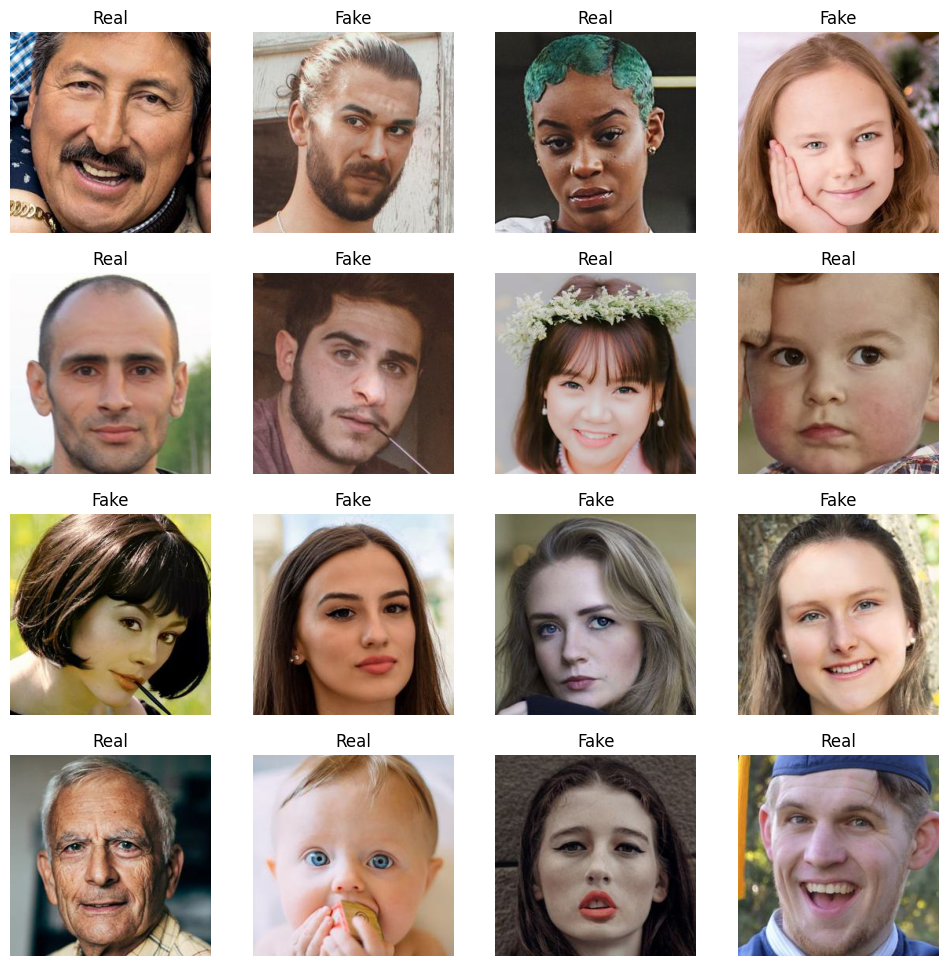

In [14]:
img,lbl = next(train_ds)
plot_images(img,lbl)

In [15]:
for img, label in train_ds:
    print("Values: ", img[0])
    print("Label: ", label[0])
    break

Values:  [[[0.15686275 0.16862746 0.14117648]
  [0.10588236 0.11764707 0.09019608]
  [0.04705883 0.05490196 0.03529412]
  ...
  [0.5411765  0.49411768 0.44705886]
  [0.5254902  0.4784314  0.43137258]
  [0.5137255  0.4666667  0.41960788]]

 [[0.18823531 0.20000002 0.17254902]
  [0.10980393 0.12156864 0.09411766]
  [0.07450981 0.08235294 0.0627451 ]
  ...
  [0.54509807 0.49803925 0.45098042]
  [0.5294118  0.48235297 0.43529415]
  [0.5176471  0.47058827 0.42352945]]

 [[0.28627452 0.2901961  0.27058825]
  [0.18431373 0.18823531 0.16862746]
  [0.10980393 0.11764707 0.10588236]
  ...
  [0.5529412  0.5058824  0.45882356]
  [0.5372549  0.4901961  0.4431373 ]
  [0.5254902  0.4784314  0.43137258]]

 ...

 [[0.79215693 0.79215693 0.79215693]
  [0.78823537 0.78823537 0.78823537]
  [0.77647066 0.77647066 0.77647066]
  ...
  [0.9333334  0.7960785  0.6784314 ]
  [0.9333334  0.78823537 0.68235296]
  [0.97647065 0.8313726  0.7254902 ]]

 [[0.79215693 0.79215693 0.79215693]
  [0.78823537 0.78823537 0.7

In [16]:
for img, label in train_ds:
    print(img.shape)
    print(label.shape)
    break

(64, 256, 256, 3)
(64,)


In [17]:
train_ds.class_indices

{'fake': 0, 'real': 1}

In [18]:
input_shape = (256, 256, 3) #define the input shape of our data

CNN

In [19]:
import tensorflow as tf
from tensorflow.keras import layers

def get_custom_cnn_model(input_shape):
    model = tf.keras.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    # Output layer for binary classification
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

# Define the input shape, e.g., (128, 128, 3) for 128x128 color images

custom_cnn_model = get_custom_cnn_model(input_shape)

In [20]:
custom_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 256)       0

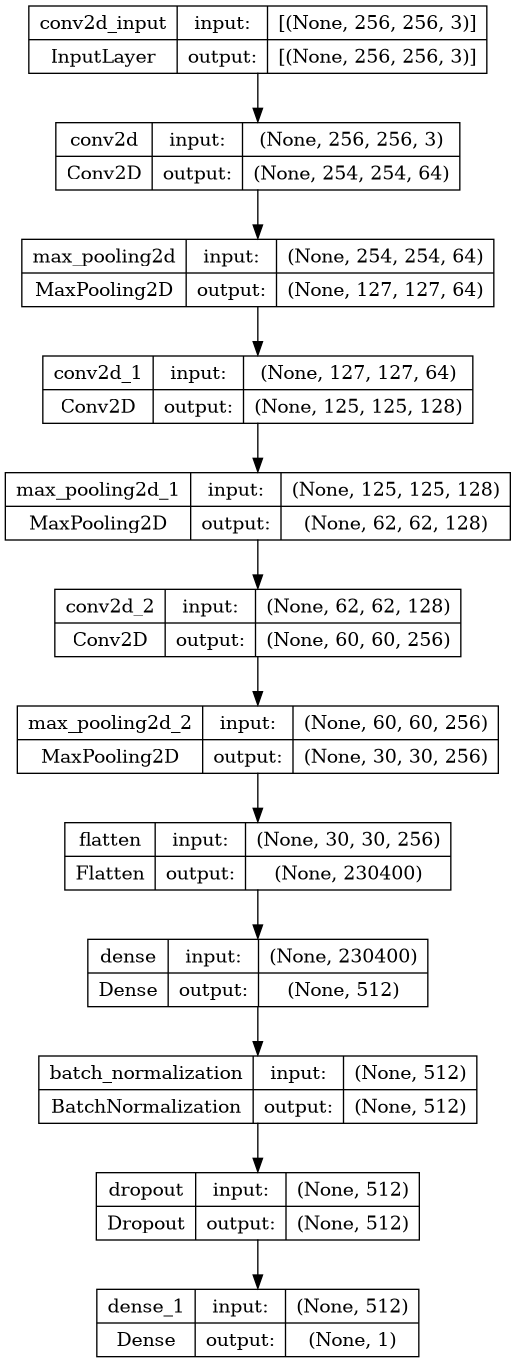

In [21]:
tf.keras.utils.plot_model(custom_cnn_model, show_shapes=True)

In [22]:
checkpoint_filepath = "model_cp.h5"

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True)

In [23]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=5,
                                                     restore_best_weights=True,
                                                    )

In [24]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=3)

In [67]:
history_ft_cnn = custom_cnn_model.fit(train_ds,
                       epochs = 5,
                       validation_data = valid_ds,
                       callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr])

Epoch 1/5
26/26 [==============================] - 9s 345ms/step - loss: 0.6896 - accuracy: 0.5797 - val_loss: 0.7707 - val_accuracy: 0.5098 - lr: 0.0010
Epoch 2/5
26/26 [==============================] - 6s 211ms/step - loss: 0.6895 - accuracy: 0.5815 - val_loss: 0.7827 - val_accuracy: 0.5539 - lr: 0.0010
Epoch 3/5
26/26 [==============================] - 8s 298ms/step - loss: 0.6667 - accuracy: 0.6066 - val_loss: 0.7534 - val_accuracy: 0.5735 - lr: 0.0010
Epoch 4/5
26/26 [==============================] - 6s 216ms/step - loss: 0.6689 - accuracy: 0.5950 - val_loss: 0.8143 - val_accuracy: 0.5588 - lr: 0.0010
Epoch 5/5
26/26 [==============================] - 8s 304ms/step - loss: 0.6598 - accuracy: 0.6127 - val_loss: 0.7425 - val_accuracy: 0.5539 - lr: 0.0010


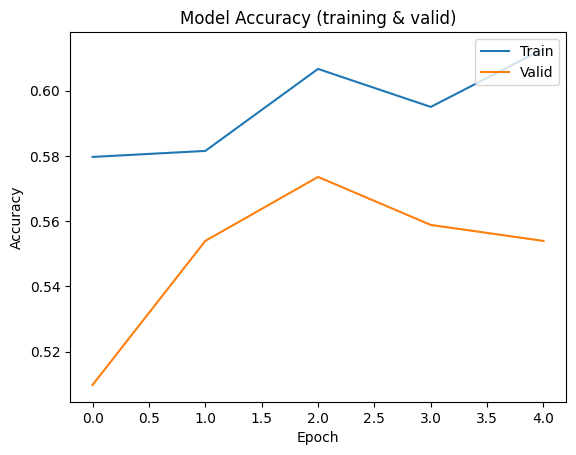

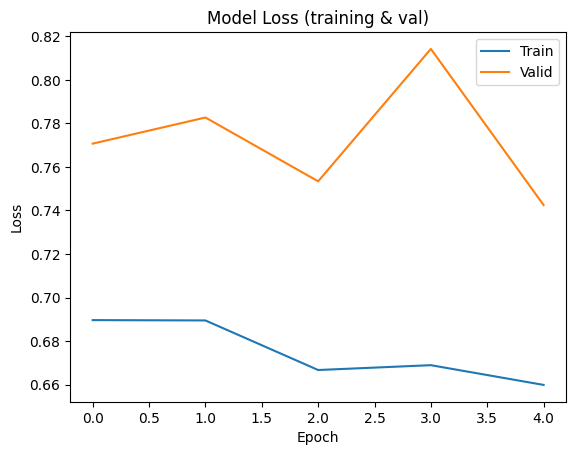

In [68]:
plt.plot(history_ft_cnn.history['accuracy'])
plt.plot(history_ft_cnn.history['val_accuracy'])
plt.title('Model Accuracy (training & valid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


plt.plot(history_ft_cnn.history['loss'])
plt.plot(history_ft_cnn.history['val_loss'])
plt.title('Model Loss (training & val)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

In [69]:
# Evaluate the model on the test set
test_loss, test_acc = custom_cnn_model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

4/4 [==============================] - 1s 131ms/step - loss: 0.6571 - accuracy: 0.5805
Test Loss: 0.6570647358894348
Test Accuracy: 0.5804877877235413


1/1 [==============================] - 0s 19ms/step


Text(0.5, 1.0, 'This image is 2.81% Fake and 97.19% Real.')

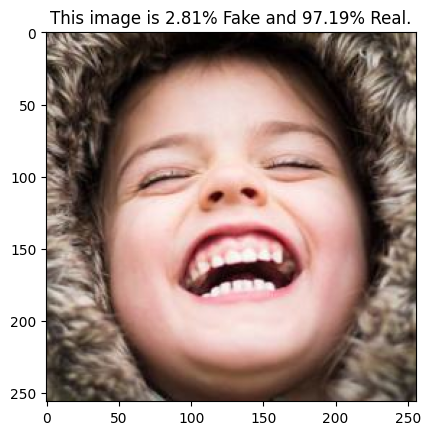

In [70]:
#real example
test_image = tf.keras.preprocessing.image.load_img('/kaggle/input/deepfake256-dataset/dataset4/test/real/real_00023.jpg', target_size=(256, 256, 3))
plt.imshow(test_image)


test_image_arr = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image, axis=0)
test_image_arr = test_image_arr/255.


result = custom_cnn_model.predict(test_image_arr)

plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")


In [71]:
predicted_labels = custom_cnn_model.predict(test_ds)
true_labels = test_ds.classes


4/4 [==============================] - 1s 132ms/step


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(true_labels, predicted_labels.round())
precision = precision_score(true_labels, predicted_labels.round())
recall = recall_score(true_labels, predicted_labels.round())
f1 = f1_score(true_labels, predicted_labels.round())

# Print the results
print("Confusion Matrix:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
Accuracy: 0.5804878048780487
Precision: 0.5649717514124294
Recall: 0.9174311926605505
F1 Score: 0.6993006993006994


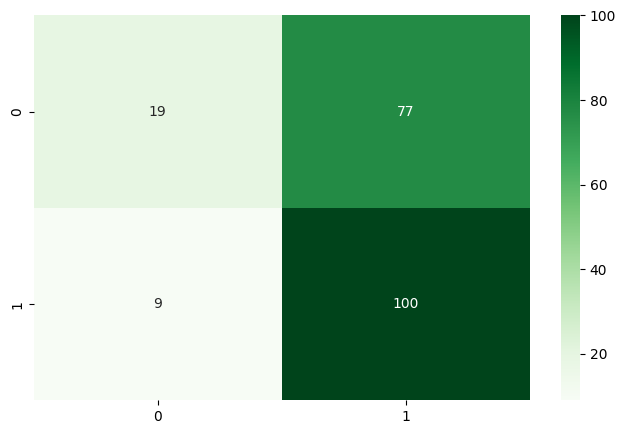

In [73]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(true_labels, predicted_labels.round()), annot = True,fmt="d",cmap = "Greens")
plt.show()

DENSENET

In [74]:
#create the model's architecture and compile it
def get_densenet_model(input_shape):

    input = tf.keras.Input(shape=input_shape)

    densenet = tf.keras.applications.DenseNet121( weights="imagenet", include_top=False, input_tensor = input)

    x = tf.keras.layers.GlobalAveragePooling2D()(densenet.output)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x) #binary classification

    model = tf.keras.Model(densenet.input, output)

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model


In [75]:
densenet_model = get_densenet_model(input_shape)

In [76]:
checkpoint_filepath = "model_cp_dense.h5"

checkpoint_cb_dense = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True)

In [108]:
history_ft_densenet = densenet_model.fit(train_ds,
                       epochs = 5,
                       validation_data = valid_ds,
                       callbacks=[checkpoint_cb_dense, early_stopping_cb, reduce_lr])

Epoch 1/5
26/26 [==============================] - 12s 464ms/step - loss: 0.0050 - accuracy: 0.9994 - val_loss: 1.0940 - val_accuracy: 0.7108 - lr: 4.0000e-05
Epoch 2/5
26/26 [==============================] - 12s 451ms/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 1.0724 - val_accuracy: 0.7304 - lr: 4.0000e-05
Epoch 3/5
26/26 [==============================] - 12s 441ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.0724 - val_accuracy: 0.7255 - lr: 4.0000e-05
Epoch 4/5
26/26 [==============================] - 12s 440ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.0765 - val_accuracy: 0.7206 - lr: 4.0000e-05
Epoch 5/5
26/26 [==============================] - 12s 443ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1.0791 - val_accuracy: 0.7157 - lr: 4.0000e-05


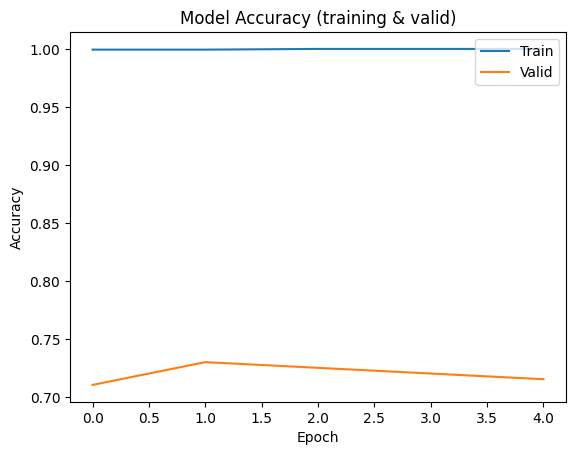

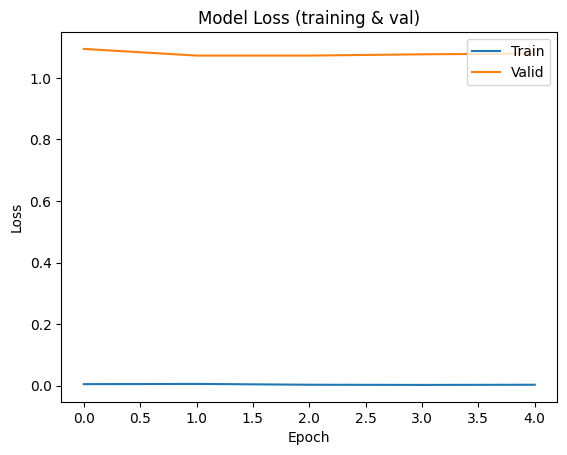

In [109]:
plt.plot(history_ft_densenet.history['accuracy'])
plt.plot(history_ft_densenet.history['val_accuracy'])
plt.title('Model Accuracy (training & valid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


plt.plot(history_ft_densenet.history['loss'])
plt.plot(history_ft_densenet.history['val_loss'])
plt.title('Model Loss (training & val)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

In [110]:
# Evaluate the model on the test set
test_loss, test_acc = densenet_model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

4/4 [==============================] - 1s 103ms/step - loss: 1.2345 - accuracy: 0.7073
Test Loss: 1.2344861030578613
Test Accuracy: 0.707317054271698


1/1 [==============================] - 0s 28ms/step


Text(0.5, 1.0, 'This image is 7.46% Fake and 92.54% Real.')

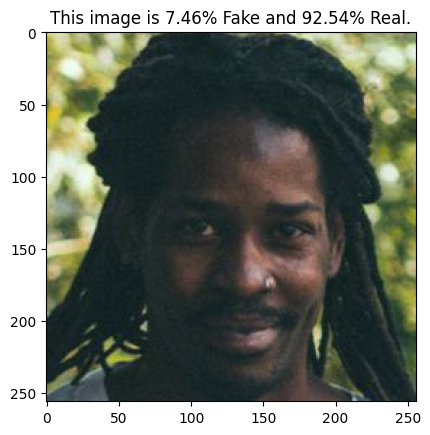

In [111]:
#real example
test_image = tf.keras.preprocessing.image.load_img('/kaggle/input/deepfake256-dataset/dataset4/test/real/real_00062.jpg', target_size=(256, 256, 3))
plt.imshow(test_image)


test_image_arr = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image, axis=0)
test_image_arr = test_image_arr/255.


result = densenet_model.predict(test_image_arr)

plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")


In [112]:
predicted_labels1 = densenet_model.predict(test_ds)
true_labels = test_ds.classes


4/4 [==============================] - 1s 155ms/step


In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy1 = accuracy_score(true_labels, predicted_labels1.round())
precision1 = precision_score(true_labels, predicted_labels1.round())
recall1 = recall_score(true_labels, predicted_labels1.round())
f11 = f1_score(true_labels, predicted_labels1.round())

# Print the results
print("Confusion Matrix:")
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

Confusion Matrix:
Accuracy: 0.7073170731707317
Precision: 0.7289719626168224
Recall: 0.7155963302752294
F1 Score: 0.7222222222222223


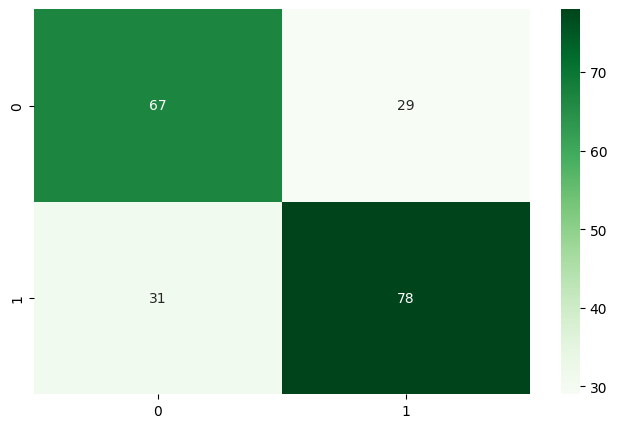

In [114]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(true_labels, predicted_labels1.round()), annot = True,fmt="d",cmap = "Greens")
plt.show()

XCEPTION

In [115]:
#create the model's architecture and compile it
def get_xcp_model(input_shape):

    input = tf.keras.Input(shape=input_shape)

    xception = tf.keras.applications.Xception( weights="imagenet", include_top=False, input_tensor = input)

    x = tf.keras.layers.GlobalAveragePooling2D()(xception.output)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x) #binary classification

    model = tf.keras.Model(xception.input, output)

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

xcp_model = get_xcp_model(input_shape)

In [116]:
checkpoint_filepath = "model_cp_xce.h5"

checkpoint_cb_xce = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True)

In [119]:
history_ft_xception = xcp_model.fit(train_ds,
                       epochs = 5,
                       validation_data = valid_ds,
                       callbacks=[checkpoint_cb_xce, early_stopping_cb, reduce_lr])

Epoch 1/5
26/26 [==============================] - 18s 695ms/step - loss: 0.0225 - accuracy: 0.9945 - val_loss: 0.5557 - val_accuracy: 0.7206 - lr: 2.0000e-04
Epoch 2/5
26/26 [==============================] - 17s 661ms/step - loss: 0.0093 - accuracy: 0.9982 - val_loss: 0.6685 - val_accuracy: 0.6422 - lr: 2.0000e-04
Epoch 3/5
26/26 [==============================] - 17s 660ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.5663 - val_accuracy: 0.7157 - lr: 2.0000e-04
Epoch 4/5
26/26 [==============================] - 18s 678ms/step - loss: 0.0193 - accuracy: 0.9945 - val_loss: 0.5539 - val_accuracy: 0.7206 - lr: 2.0000e-04
Epoch 5/5
26/26 [==============================] - 17s 660ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.6046 - val_accuracy: 0.7010 - lr: 2.0000e-04


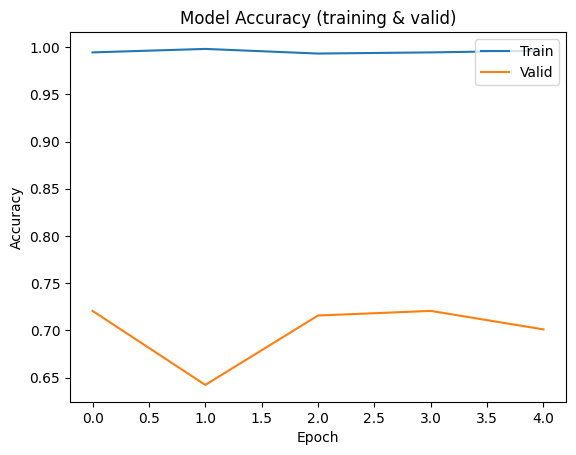

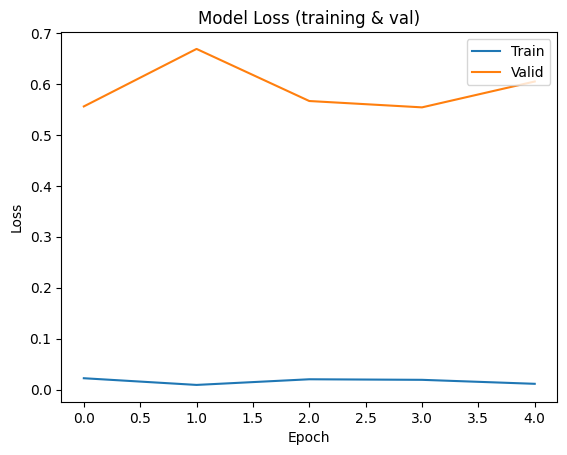

In [120]:
plt.plot(history_ft_xception.history['accuracy'])
plt.plot(history_ft_xception.history['val_accuracy'])
plt.title('Model Accuracy (training & valid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


plt.plot(history_ft_xception.history['loss'])
plt.plot(history_ft_xception.history['val_loss'])
plt.title('Model Loss (training & val)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

In [121]:
# Evaluate the model on the test set
test_loss, test_acc = xcp_model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

4/4 [==============================] - 1s 138ms/step - loss: 0.6471 - accuracy: 0.6878
Test Loss: 0.6471170783042908
Test Accuracy: 0.6878048777580261


1/1 [==============================] - 1s 805ms/step


Text(0.5, 1.0, 'This image is 4.01% Fake and 95.99% Real.')

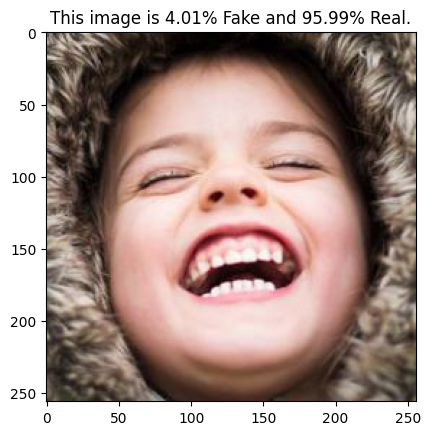

In [122]:
#real example
test_image = tf.keras.preprocessing.image.load_img('/kaggle/input/deepfake256-dataset/dataset4/test/real/real_00023.jpg', target_size=(256, 256, 3))
plt.imshow(test_image)


test_image_arr = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image, axis=0)
test_image_arr = test_image_arr/255.


result = xcp_model.predict(test_image_arr)

plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")


In [123]:
predicted_labels2 = xcp_model.predict(test_ds)
true_labels = test_ds.classes

4/4 [==============================] - 2s 171ms/step


In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy2 = accuracy_score(true_labels, predicted_labels2.round())
precision2 = precision_score(true_labels, predicted_labels2.round())
recall2 = recall_score(true_labels, predicted_labels2.round())
f12 = f1_score(true_labels, predicted_labels2.round())

# Print the results
print("Confusion Matrix:")
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)

Confusion Matrix:
Accuracy: 0.6878048780487804
Precision: 0.6744186046511628
Recall: 0.7981651376146789
F1 Score: 0.73109243697479


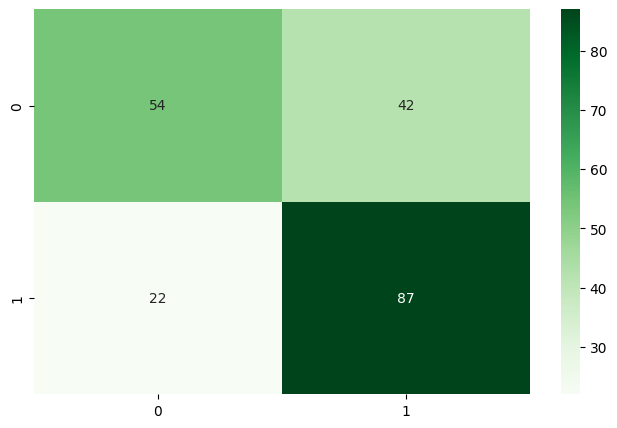

In [125]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(true_labels, predicted_labels2.round()), annot = True,fmt="d",cmap = "Greens")
plt.show()